### Planteamiento del Problema
El problema está enfocado en el análisis y la agrupación de un conjunto de datos de vinos. Para esto, se utilizarán diferentes técnicas de análisis y clustering con el objetivo de encontrar patrones significativos en los datos y poder juzgar la calidad de los vinos de cada cluster. El objetivo final es ver si se pueden rankear de mayor a menor calidad de vino de acuerdo a sus características químicas. 

### Preguntas de Investigación

* ¿Es posible encontrar grupos o clusters significativos de vinos basados en sus características químicas?

* ¿Es posible juzgar la calidad del vino de acuerdo al cluster al que pertenece?

* ¿Se pueden encontrar qué tipos de vino formarán parte de cada cluster que se realice?

### Metodología

1. Preparación de los datos.
2. Se importan los datos y se analiza su calidad (valores nulos, tipos de datos).
3. Se normalizan los datos para que las características tengan igual importancia en el análisis.
4. Análisis de Componentes Principales (PCA): Se aplica PCA para reducir la dimensionalidad de los datos y visualizar la distribución general.
5. KMeans Clustering: Se aplica KMeans para encontrar clusters de datos y se evalúa la calidad de los clusters obtenidos.
6. Dendrogramas: Se utilizan dendrogramas para entender las relaciones jerárquicas entre los datos y evaluar posibles agrupamientos.
7. Mapper y Topological Data Analysis (TDA): Mapper se utiliza para encontrar patrones en los datos usando análisis topológico. 
8. Se grafican los clusters y se juzgan los resultados. 
9. Rankear de mayor a menor calidad de acuerdo al cluster al que pertenece el vino. 


In [98]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import gudhi as gd
import kmapper as km
from ripser import ripser

In [99]:
#se lee la base de datos
df = pd.read_csv("wine-clustering.csv")
df


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [100]:
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [101]:
#no se encnotraron valores nulos
print(df.isnull().sum())

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [102]:
#imprimimos los tipos de datos que hay en el df
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None


In [103]:
#Vemos la distribución general y notamos la necesidad de normalizar los datos.
print(df.describe())

          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

In [104]:
#se normalizan los datos
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_data, columns=df.columns)
print(scaled_df.head())

    Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0  1.518613   -0.562250  0.232053     -1.169593   1.913905       0.808997   
1  0.246290   -0.499413 -0.827996     -2.490847   0.018145       0.568648   
2  0.196879    0.021231  1.109334     -0.268738   0.088358       0.808997   
3  1.691550   -0.346811  0.487926     -0.809251   0.930918       2.491446   
4  0.295700    0.227694  1.840403      0.451946   1.281985       0.808997   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0    1.034819             -0.659563         1.224884         0.251717   
1    0.733629             -0.820719        -0.544721        -0.293321   
2    1.215533             -0.498407         2.135968         0.269020   
3    1.466525             -0.981875         1.032155         1.186068   
4    0.663351              0.226796         0.401404        -0.319276   

        Hue     OD280   Proline  
0  0.362177  1.847920  1.013009  
1  0.406051  1.113449  0.96524

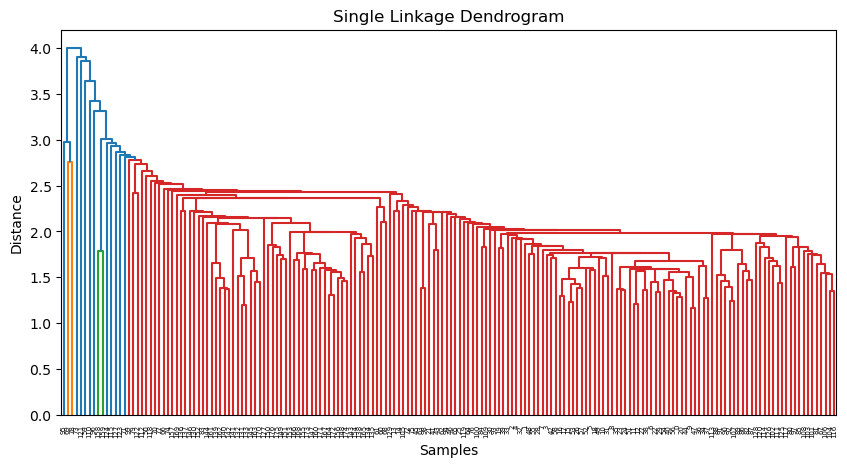

In [105]:
#se hace un dendograma usando single_linkage clustering y los datos normalizados
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

linkage_matrix = linkage(scaled_data, method='single')

plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Single Linkage Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

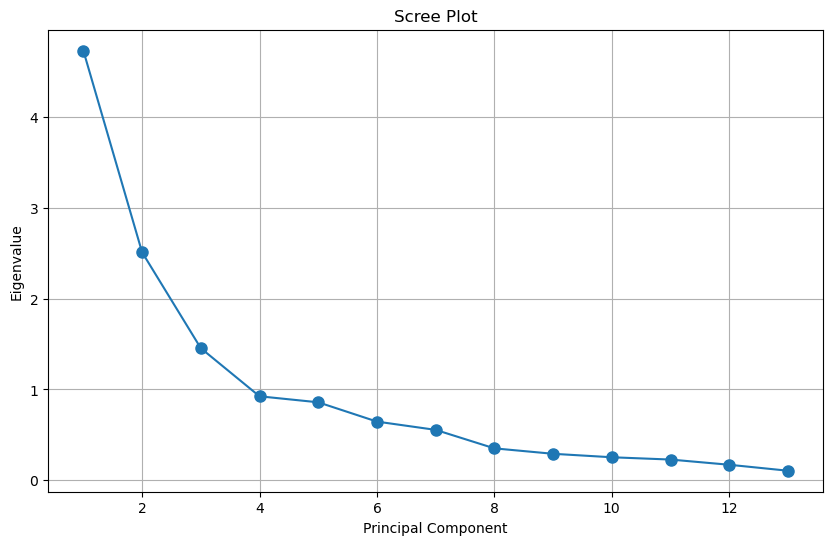

In [106]:
#se hace el pca y el screeplot para ver cuantos componentes son necesarios (la respuesta es 3)
pca = PCA()
data_pca = pca.fit_transform(scaled_data)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_) + 1), pca.explained_variance_, 'o-', markersize=8)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [107]:
#se hace el pca con 3 componentes
pca = PCA(n_components=3)
data_pca = pca.fit_transform(scaled_data)

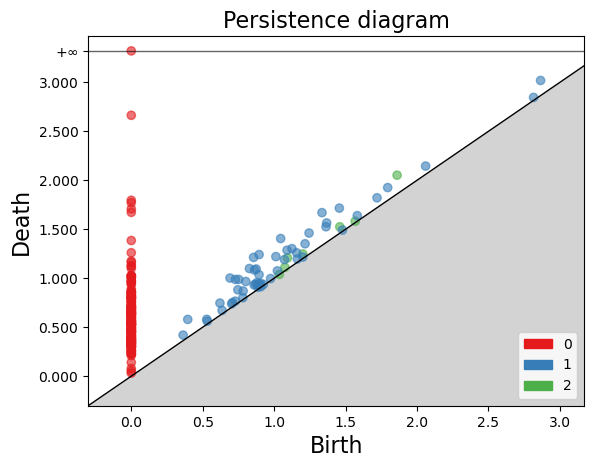

In [169]:
#se hace el diagrama de persistencia usando Rips para ver la estructura de los datos y se encuentra que si hay valores persistentes, lo que puede ayudar al clustering
rips_complex = gd.RipsComplex(points=data_pca, max_edge_length=10)
simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)
diag = simplex_tree.persistence()
gd.plot_persistence_diagram(diag)
plt.show()

In [109]:
#Se hace el PCA con 3 componentes y se verifica la varianza explicada
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2', 'PCA3'])

explained_variance_ratio = pca.explained_variance_ratio_

pca_df.head(), explained_variance_ratio

(       PCA1      PCA2      PCA3
 0  3.316751 -1.443463 -0.165739
 1  2.209465  0.333393 -2.026457
 2  2.516740 -1.031151  0.982819
 3  3.757066 -2.756372 -0.176192
 4  1.008908 -0.869831  2.026688,
 array([0.36198848, 0.1920749 , 0.11123631]))

In [110]:
#los datos explican el 66.5% de la varianza
explained_variance_ratio.sum()

0.665299688931853

In [111]:
#esto es solamente para ponerlo como tooltip en el mapper. 
new_column_values = []

for index, row in df.iterrows():
    new_column_values.append(', '.join([f"{col}: {row[col]}" for col in df.columns]))

df['String'] = new_column_values

In [112]:
#HAgo el mapper usando 10 cubos y el 20% de overlap, lo que dio el mejor resultado. 

import kmapper as km
from sklearn.cluster import KMeans

mapper = km.KeplerMapper()
lens = mapper.fit_transform(pca_df.values)

cover = km.Cover(n_cubes=10, perc_overlap=0.2)
kmeans_clusterer = KMeans(n_clusters=3, random_state=42)  
graph = mapper.map(lens, pca_df.values, clusterer=kmeans_clusterer, cover=cover)

mapper.visualize(graph, custom_tooltips=df['String'], path_html='wine_mapper2.html', title="Wine Characteristics Mapper")

/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/valeriaserna/anaconda3/envs/TC2004B/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

'<!DOCTYPE html>\n<html>\n\n<head>\n  <meta charset="utf-8">\n  <meta name="generator" content="KeplerMapper">\n  <title>Wine Characteristics Mapper | KeplerMapper</title>\n\n  <link rel="icon" type="image/png" href="http://i.imgur.com/axOG6GJ.jpg" />\n\n  <link href=\'https://fonts.googleapis.com/css?family=Roboto+Mono:700,300\' rel=\'stylesheet\' type=\'text/css\'>\n  <style>* {\n  margin: 0;\n  padding: 0;\n}\n\nhtml, body {\n  height: 100%;\n}\n\nbody {\n  font-family: "Roboto Mono", "Helvetica", sans-serif;\n  font-size: 14px;\n}\n\n#logo {\n  width:  85px;\n  height: 85px;\n}\n\n#display {\n  color: #95A5A6;\n  background: #212121;\n}\n\n#header {\n  background: #111111;\n}\n\n#print {\n  color: #000;\n  background: #FFF;\n}\n\nh1 {\n  font-size: 21px;\n  font-weight: 300;\n  font-weight: 300;\n}\n\nh2 {\n  font-size: 18px;\n  padding-bottom: 20px;\n  font-weight: 300;\n}\n\nh3 {\n  font-size: 14px;\n  font-weight: 700;\n  text-transform: uppercase;\n}\n\nh4 {\n  font-size: 13px;

In [113]:
#imprimo las columnas para ver cuales son
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'String'],
      dtype='object')

In [115]:
#hago un poquito de exploración de los nodos para ir viendo la distribución de los datos
node_data_points = graph['nodes']['cube5_cluster1']
specific_data_points = df.iloc[node_data_points]
specific_data_points.mean()

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_42226/3852956236.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  specific_data_points.mean()


Alcohol                  12.315333
Malic_Acid                2.346667
Ash                       2.215333
Ash_Alcanity             20.133333
Magnesium                90.333333
Total_Phenols             1.814667
Flavanoids                1.725333
Nonflavanoid_Phenols      0.391333
Proanthocyanins           1.480000
Color_Intensity           2.988667
Hue                       0.992000
OD280                     2.660000
Proline                 484.533333
dtype: float64

In [116]:
node_data_points = graph['nodes']['cube6_cluster1']
specific_data_points = df.iloc[node_data_points]
specific_data_points.mean()

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_42226/2822322150.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  specific_data_points.mean()


Alcohol                  12.313077
Malic_Acid                1.616923
Ash                       1.953846
Ash_Alcanity             18.423077
Magnesium                91.538462
Total_Phenols             2.216154
Flavanoids                2.036154
Nonflavanoid_Phenols      0.300000
Proanthocyanins           1.710000
Color_Intensity           3.067692
Hue                       1.086923
OD280                     3.100769
Proline                 538.461538
dtype: float64

In [117]:
node_data_points = graph['nodes']['cube2_cluster0']
specific_data_points = df.iloc[node_data_points]
specific_data_points.mean()

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_42226/2702812474.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  specific_data_points.mean()


Alcohol                  12.819231
Malic_Acid                2.967692
Ash                       2.323846
Ash_Alcanity             19.600000
Magnesium                96.615385
Total_Phenols             1.651538
Flavanoids                0.903077
Nonflavanoid_Phenols      0.401538
Proanthocyanins           0.859231
Color_Intensity           5.206154
Hue                       0.762308
OD280                     1.661538
Proline                 580.923077
dtype: float64

In [118]:
node_data_points = graph['nodes']['cube6_cluster0']
specific_data_points = df.iloc[node_data_points]
specific_data_points.mean()

/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_42226/912021822.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  specific_data_points.mean()


Alcohol                   13.557619
Malic_Acid                 1.918571
Ash                        2.519048
Ash_Alcanity              17.766667
Magnesium                108.571429
Total_Phenols              2.836190
Flavanoids                 2.980952
Nonflavanoid_Phenols       0.292857
Proanthocyanins            1.968095
Color_Intensity            5.219524
Hue                        1.075714
OD280                      3.263810
Proline                 1053.333333
dtype: float64

In [119]:
#agarro un nodo que y reviso todas las filas que están adentro de el
node_data_points = graph['nodes']['cube7_cluster0']
specific_data_points = df.iloc[node_data_points]
specific_data_points

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,String
63,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.45,1.22,2.87,420,"Alcohol: 12.37, Malic_Acid: 1.13, Ash: 2.16, A..."
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886,"Alcohol: 11.96, Malic_Acid: 1.09, Ash: 2.3, As..."
80,12.00,0.92,2.00,19.0,86,2.42,2.26,0.30,1.43,2.50,1.38,3.12,278,"Alcohol: 12.0, Malic_Acid: 0.92, Ash: 2.0, Ash..."
84,11.84,0.89,2.58,18.0,94,2.20,2.21,0.22,2.35,3.05,0.79,3.08,520,"Alcohol: 11.84, Malic_Acid: 0.89, Ash: 2.58, A..."
85,12.67,0.98,2.24,18.0,99,2.20,1.94,0.30,1.46,2.62,1.23,3.16,450,"Alcohol: 12.67, Malic_Acid: 0.98, Ash: 2.24, A..."
93,12.29,2.83,2.22,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290,"Alcohol: 12.29, Malic_Acid: 2.83, Ash: 2.22, A..."
94,11.62,1.99,2.28,18.0,98,3.02,2.26,0.17,1.35,3.25,1.16,2.96,345,"Alcohol: 11.62, Malic_Acid: 1.99, Ash: 2.28, A..."
97,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428,"Alcohol: 12.29, Malic_Acid: 1.41, Ash: 1.98, A..."
98,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660,"Alcohol: 12.37, Malic_Acid: 1.07, Ash: 2.1, As..."
110,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562,"Alcohol: 11.46, Malic_Acid: 3.74, Ash: 1.82, A..."


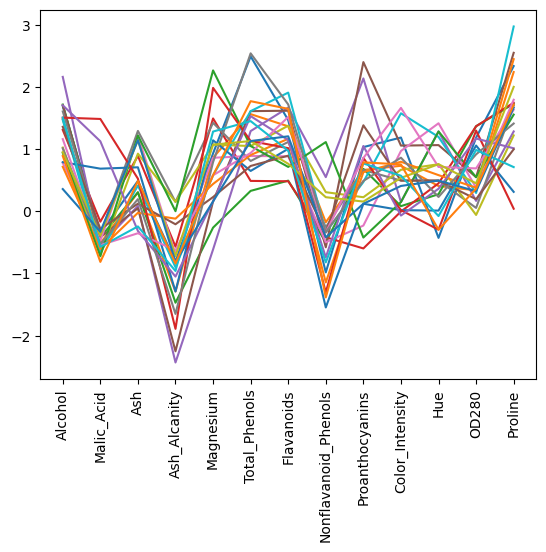

In [120]:
#veo un poquito del comportamiento por variable, observando que si siguen los mismos comportamientos (bajan y suben de nivel en los mismos lugares en las variables más importantes)
node_data_points = graph['nodes']['cube5_cluster0']
specific_data_points = scaled_df.iloc[node_data_points]
plt.plot(specific_data_points.T)  
plt.xticks(range(len(scaled_df.columns)), scaled_df.columns, rotation=90) 
plt.show()

In [121]:
import numpy as np

# Calculate standard deviation across rows
std_dev_across_rows = specific_data_points.std(axis=0)

# Sort features by standard deviation in ascending order
sorted_features = std_dev_across_rows.sort_values()

print(sorted_features)

Flavanoids              0.399912
Alcohol                 0.435011
OD280                   0.450933
Color_Intensity         0.495124
Ash                     0.524596
Hue                     0.530191
Total_Phenols           0.563641
Malic_Acid              0.593030
Nonflavanoid_Phenols    0.634306
Magnesium               0.686340
Proline                 0.709571
Proanthocyanins         0.715418
Ash_Alcanity            0.715433
dtype: float64


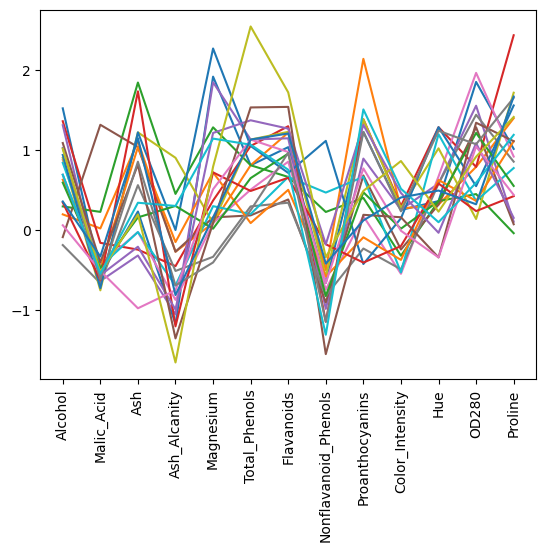

In [122]:
node_data_points = graph['nodes']['cube6_cluster0']
specific_data_points = scaled_df.iloc[node_data_points]
plt.plot(specific_data_points.T)  # Transpose DataFrame for correct plotting
plt.xticks(range(len(scaled_df.columns)), scaled_df.columns, rotation=90)  # Set x-axis labels to DataFrame columns
plt.show()

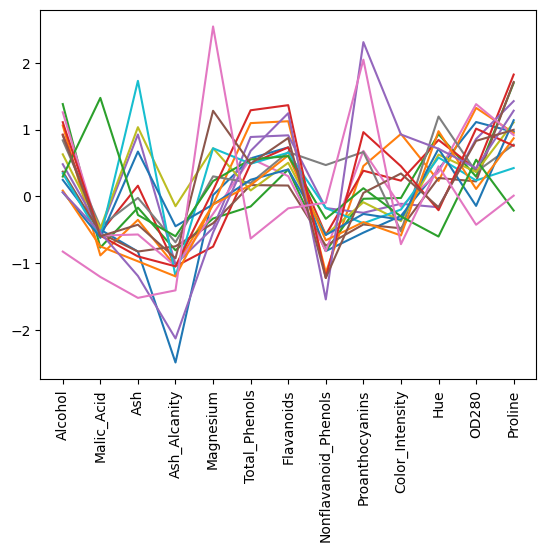

In [123]:
node_data_points = graph['nodes']['cube5_cluster2']
specific_data_points = scaled_df.iloc[node_data_points]
plt.plot(specific_data_points.T)  # Transpose DataFrame for correct plotting
plt.xticks(range(len(scaled_df.columns)), scaled_df.columns, rotation=90)  # Set x-axis labels to DataFrame columns
plt.show()

In [124]:
#busco encontrar los clusters con una mayor y menor cantidad de puntos adentro.  

cluster_data_points = []

for j in range(10):
    cube_key = f"cube{j}"
    num_clusters = 3 
    
    for i in range(num_clusters):
        cluster_key = f"{cube_key}_cluster{i}"
        if cluster_key in graph['nodes']:  
            node_data_points = graph['nodes'][cluster_key]
            num_data_points = len(node_data_points)
            cluster_data_points.append((cluster_key, num_data_points))
        else:
            print(f"Cluster {cluster_key} does not exist in the graph.")

cluster_data_points.sort(key=lambda x: x[1], reverse=True)

print("Five most important clusters:")
for cluster_key, num_data_points in cluster_data_points[:5]:
    print(f"{cluster_key}: {num_data_points} data points")

print("\nFive least important clusters:")
for cluster_key, num_data_points in cluster_data_points[-5:]:
    print(f"{cluster_key}: {num_data_points} data points")


Five most important clusters:
cube5_cluster0: 22 data points
cube6_cluster0: 21 data points
cube5_cluster2: 17 data points
cube5_cluster1: 15 data points
cube2_cluster0: 13 data points

Five least important clusters:
cube3_cluster2: 1 data points
cube8_cluster1: 1 data points
cube9_cluster0: 1 data points
cube9_cluster1: 1 data points
cube9_cluster2: 1 data points


In [125]:
#Hago el df con mi cluster num 1, el más grande del Mapper y concateno todas las filas. 

#hay 2 variables una tiene los valores normalizados y otra los originales.

cluster_names = ['cube0_cluster2', 'cube1_cluster0', 'cube0_cluster0', 'cube1_cluster1', 'cube2_cluster0', 'cube0_cluster0', 'cube1_cluster2', 'cube3_cluster1', 'cube4_cluster1', 'cube5_cluster1', 'cube4_cluster2', 'cube6_cluster1''cube0_cluster0', 'cube7_cluster0', 'cube8_cluster2', 'cube6_cluster2', 'cube7_cluster1', 'cube8_cluster0']

amarillo = pd.DataFrame()
amarillo_n = pd.DataFrame()

for cluster_name in cluster_names:
    node_data_points = graph['nodes'][cluster_name]
    specific_data_points = scaled_df.iloc[node_data_points]
    specific_data_points_n = df.iloc[node_data_points]

    amarillo = pd.concat([amarillo, specific_data_points])
    amarillo_n = pd.concat([amarillo_n, specific_data_points_n])

amarillo.reset_index(drop=True, inplace=True)
amarillo_n.reset_index(drop=True, inplace=True)

In [126]:
amarillo.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,-0.482194,0.265786,-0.145878,0.306242,-0.332311,-0.481507,-0.485885,0.335401,-0.374997,-0.145683,-0.299662,-0.463451,-0.623849
std,0.839297,1.195456,0.857867,0.748753,0.801662,0.887667,0.798087,1.030745,0.905032,1.091757,1.085502,0.952006,0.475861
min,-1.964835,-1.432983,-2.399793,-1.049479,-2.088255,-1.914966,-1.565455,-1.868234,-2.069034,-1.634288,-2.094732,-1.895054,-1.493188
25%,-1.137207,-0.768712,-0.608676,-0.223695,-0.964842,-1.097777,-1.274305,-0.498407,-0.973982,-0.985433,-1.195328,-1.386574,-1.015514
50%,-0.717217,0.102021,-0.170035,0.301803,-0.473348,-0.601054,-0.531369,0.468530,-0.422075,-0.544212,-0.339797,-0.496736,-0.627005
75%,0.147468,1.300401,0.378266,0.752231,0.158572,0.103972,0.091090,1.113154,0.059748,0.515585,0.427987,0.343668,-0.292634
max,1.432144,3.109192,2.023170,2.704083,2.405399,1.962676,1.727556,2.402403,3.485073,2.483778,2.160986,1.452436,0.442985


In [127]:
amarillo_n.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,12.610261,2.632435,2.326609,20.514783,95.008696,1.994609,1.545304,0.403478,1.376870,4.721304,0.889148,2.283565,550.991304
std,0.679447,1.331742,0.234689,2.493474,11.417512,0.553984,0.794934,0.127919,0.516546,2.523886,0.247417,0.674014,149.430762
min,11.410000,0.740000,1.710000,16.000000,70.000000,1.100000,0.470000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.080000,1.480000,2.200000,18.750000,86.000000,1.610000,0.760000,0.300000,1.035000,2.780000,0.685000,1.630000,428.000000
50%,12.420000,2.450000,2.320000,20.500000,93.000000,1.920000,1.500000,0.420000,1.350000,3.800000,0.880000,2.260000,550.000000
75%,13.120000,3.785000,2.470000,22.000000,102.000000,2.360000,2.120000,0.500000,1.625000,6.250000,1.055000,2.855000,655.000000
max,14.160000,5.800000,2.920000,28.500000,134.000000,3.520000,3.750000,0.660000,3.580000,10.800000,1.450000,3.640000,886.000000


In [128]:
#Cluster num 2
cluster_names = ['cube8_cluster1', 'cube7_cluster2', 'cube6_cluster0', 'cube5_cluster0', 'cube5_cluster2', 'cube4_cluster0']

morado = pd.DataFrame()
morado_n = pd.DataFrame()

for cluster_name in cluster_names:
    node_data_points = graph['nodes'][cluster_name]
    specific_data_points = scaled_df.iloc[node_data_points]
    specific_data_points_n = df.iloc[node_data_points]

    morado = pd.concat([morado, specific_data_points])
    morado_n = pd.concat([morado_n, specific_data_points_n])

morado.reset_index(drop=True, inplace=True)
morado_n.reset_index(drop=True, inplace=True)

In [129]:
morado.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.824193,-0.321094,0.353074,-0.681021,0.565619,0.814194,0.906881,-0.511474,0.554830,0.134923,0.477790,0.696206,1.140776
std,0.604488,0.612298,0.906907,0.786044,0.890489,0.590929,0.425934,0.588816,0.791128,0.546093,0.507797,0.499276,0.695550
min,-0.828391,-1.208567,-1.522511,-2.490847,-0.754202,-0.633101,-0.179981,-1.545922,-0.597284,-1.063296,-0.603037,-0.426113,-0.213021
25%,0.357463,-0.616110,-0.279695,-1.049479,0.018145,0.488531,0.630722,-0.820719,-0.014716,-0.299810,0.230557,0.326012,0.722424
50%,0.894804,-0.521855,0.250329,-0.749194,0.334105,0.808997,0.889244,-0.578985,0.480248,0.115457,0.493797,0.548472,1.108544
75%,1.296265,-0.353543,1.036228,-0.208681,1.071345,1.129464,1.213023,-0.337251,0.883228,0.460432,0.757038,1.067545,1.689714
max,2.259772,1.529305,3.119772,1.653086,4.371372,2.539515,1.908270,1.113154,2.959447,1.661895,1.415139,1.960915,2.971473


In [130]:
#Cluster num 3

cluster_names = ['cube2_cluster2', 'cube3_cluster0']

verdecillo = pd.DataFrame()
verdecillo_n = pd.DataFrame()

for cluster_name in cluster_names:
    node_data_points = graph['nodes'][cluster_name]
    specific_data_points = scaled_df.iloc[node_data_points]
    specific_data_points_n = df.iloc[node_data_points]
    verdecillo = pd.concat([verdecillo, specific_data_points])
    verdecillo_n = pd.concat([verdecillo_n, specific_data_points_n])


verdecillo.reset_index(drop=True, inplace=True)
verdecillo_n.reset_index(drop=True, inplace=True)

In [131]:
verdecillo.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.195232,0.672935,1.060596,1.232687,0.004102,-0.657670,-1.227453,1.182989,-0.639334,0.704185,-0.854578,-0.927060,-0.475211
std,0.600087,0.918728,0.429109,0.526876,0.569922,0.662816,0.357616,0.942092,1.086994,1.185281,0.519505,0.364152,0.346232
min,-0.680159,-0.598156,-0.170035,0.451946,-1.035055,-1.209940,-1.535336,-0.820719,-1.823742,-0.306298,-1.699872,-1.810307,-1.025067
25%,-0.186053,0.321948,0.944844,0.827302,-0.262708,-1.193917,-1.485138,1.113154,-1.420763,-0.154899,-1.261138,-1.160584,-0.722540
50%,0.061000,0.622666,1.182441,1.202658,-0.192495,-1.033684,-1.434939,1.354888,-0.860096,0.225763,-0.822404,-0.849846,-0.499626
75%,0.616869,0.838105,1.255548,1.653086,0.404318,-0.328658,-1.003233,1.918935,-0.071658,1.272582,-0.383670,-0.708602,-0.388168
max,1.654492,2.848870,1.803849,2.253656,1.141558,0.808997,-0.441012,2.160669,1.943238,3.435432,-0.295924,-0.426113,0.423878


In [132]:
# Cluster num 4
cluster_names = ['cube3_cluster2', 'cube2_cluster1']

dos_azul = pd.DataFrame()
dos_azul_n = pd.DataFrame()

for cluster_name in cluster_names:
    node_data_points = graph['nodes'][cluster_name]
    specific_data_points = scaled_df.iloc[node_data_points]
    specific_data_points_n = df.iloc[node_data_points]

    dos_azul = pd.concat([dos_azul, specific_data_points])
    dos_azul_n = pd.concat([dos_azul_n, specific_data_points_n])

dos_azul.reset_index(drop=True, inplace=True)
dos_azul_n.reset_index(drop=True, inplace=True)

In [133]:
# Cluster num 5 (no lo usé porque solo es un punto)
cluster_names = ['cube9_cluster1']

verdesolo = pd.DataFrame()
verdesolo_n = pd.DataFrame()

for cluster_name in cluster_names:
    node_data_points = graph['nodes'][cluster_name]
    specific_data_points = scaled_df.iloc[node_data_points]
    specific_data_points_n = df.iloc[node_data_points]

    verdesolo = pd.concat([verdesolo, specific_data_points])
    verdesolo_n = pd.concat([verdesolo_n, specific_data_points_n])

verdesolo.reset_index(drop=True, inplace=True)
verdesolo_n.reset_index(drop=True, inplace=True)

In [134]:
# cluster num 6 (tampooc lo use)
amarillosolo = ['cube0_cluster1']

amarillosolo = pd.DataFrame()
amarillosolo_n = pd.DataFrame()

for cluster_name in cluster_names:
    node_data_points = graph['nodes'][cluster_name]
    specific_data_points = scaled_df.iloc[node_data_points]
    specific_data_points_n = df.iloc[node_data_points]

    amarillosolo = pd.concat([amarillosolo, specific_data_points])
    amarillosolo_n = pd.concat([amarillosolo_n, specific_data_points_n])

amarillosolo.reset_index(drop=True, inplace=True)
amarillosolo_n.reset_index(drop=True, inplace=True)

In [135]:
# cluster num 7 tampoco lo use
cluster_names = ['cube9_cluster0']

verdesolo2 = pd.DataFrame()
verdesolo2_n = pd.DataFrame()

for cluster_name in cluster_names:
    node_data_points = graph['nodes'][cluster_name]
    specific_data_points = scaled_df.iloc[node_data_points]
    specific_data_points_n = df.iloc[node_data_points]

    verdesolo2 = pd.concat([verdesolo2, specific_data_points])
    verdesolo2_n = pd.concat([verdesolo2_n, specific_data_points_n])

verdesolo2.reset_index(drop=True, inplace=True)
verdesolo2_n.reset_index(drop=True, inplace=True)

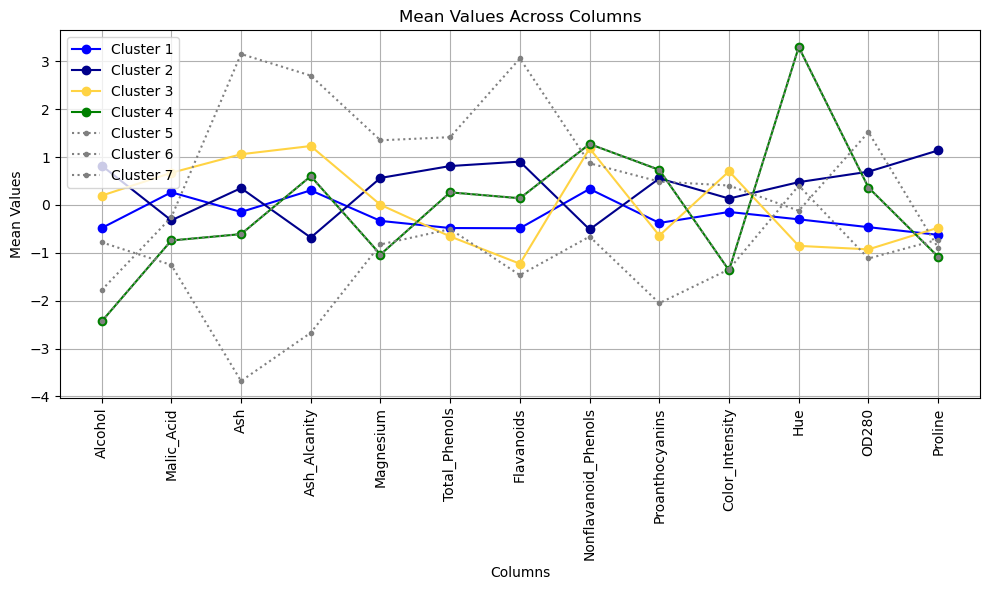

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# promedios por cluster 
mean_df1 = amarillo.mean()
mean_df2 = morado.mean()
mean_df3 = verdecillo.mean()
mean_df4 = verdesolo.mean()
mean_df5 = dos_azul.mean()
mean_df6 = amarillosolo.mean()
mean_df7 = verdesolo2.mean()


# columnas
columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
           'Color_Intensity', 'Hue', 'OD280', 'Proline']

# plot los valores por cluster
#en gris están los valores que son únicos y en realidad no son un cluster (5, 6, 7)
plt.figure(figsize=(10, 6))  
mean_df1.plot(kind='line', marker='o', linestyle='-', color='blue', label='Cluster 1')
mean_df2.plot(kind='line', marker='o', linestyle='-', color='darkblue', label='Cluster 2')
mean_df3.plot(kind='line', marker='o', linestyle='-', color='#ffd343', label='Cluster 3')
mean_df4.plot(kind='line', marker='o', linestyle='-', color='green', label='Cluster 4')
mean_df5.plot(kind='line', marker='.', linestyle=':', color='gray', label='Cluster 5')
mean_df6.plot(kind='line', marker='.', linestyle=':', color='gray', label='Cluster 6')
mean_df7.plot(kind='line', marker='.', linestyle=':', color='gray', label='Cluster 7')


plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values Across Columns')
plt.grid(True)
plt.legend()

plt.xticks(range(len(columns)), columns, rotation=90)

plt.tight_layout()
plt.show()


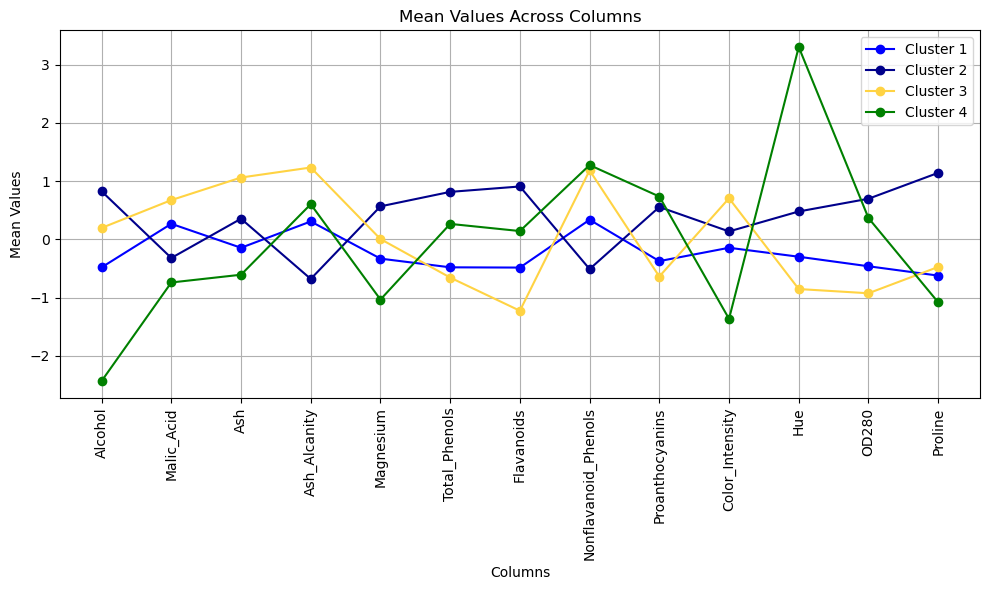

In [163]:
#Mejor borré los solitarios (5, 6, 7)
import pandas as pd
import matplotlib.pyplot as plt

mean_df1 = amarillo.mean()
mean_df2 = morado.mean()
mean_df3 = verdecillo.mean()
mean_df4 = verdesolo.mean()


columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
           'Color_Intensity', 'Hue', 'OD280', 'Proline']

plt.figure(figsize=(10, 6)) 
mean_df1.plot(kind='line', marker='o', linestyle='-', color='blue', label='Cluster 1')
mean_df2.plot(kind='line', marker='o', linestyle='-', color='darkblue', label='Cluster 2')
mean_df3.plot(kind='line', marker='o', linestyle='-', color='#ffd343', label='Cluster 3')
mean_df4.plot(kind='line', marker='o', linestyle='-', color='green', label='Cluster 4')


plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values Across Columns')
plt.grid(True)
plt.legend()

plt.xticks(range(len(columns)), columns, rotation=90)

plt.tight_layout()
plt.show()


/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_42226/957073546.py:7: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_df1 = amarillo_n.mean()
/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_42226/957073546.py:8: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_df2 = morado_n.mean()
/var/folders/b5/6d3jsq3n12j27vfn8yqh_y500000gn/T/ipykernel_42226/957073546.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, spe

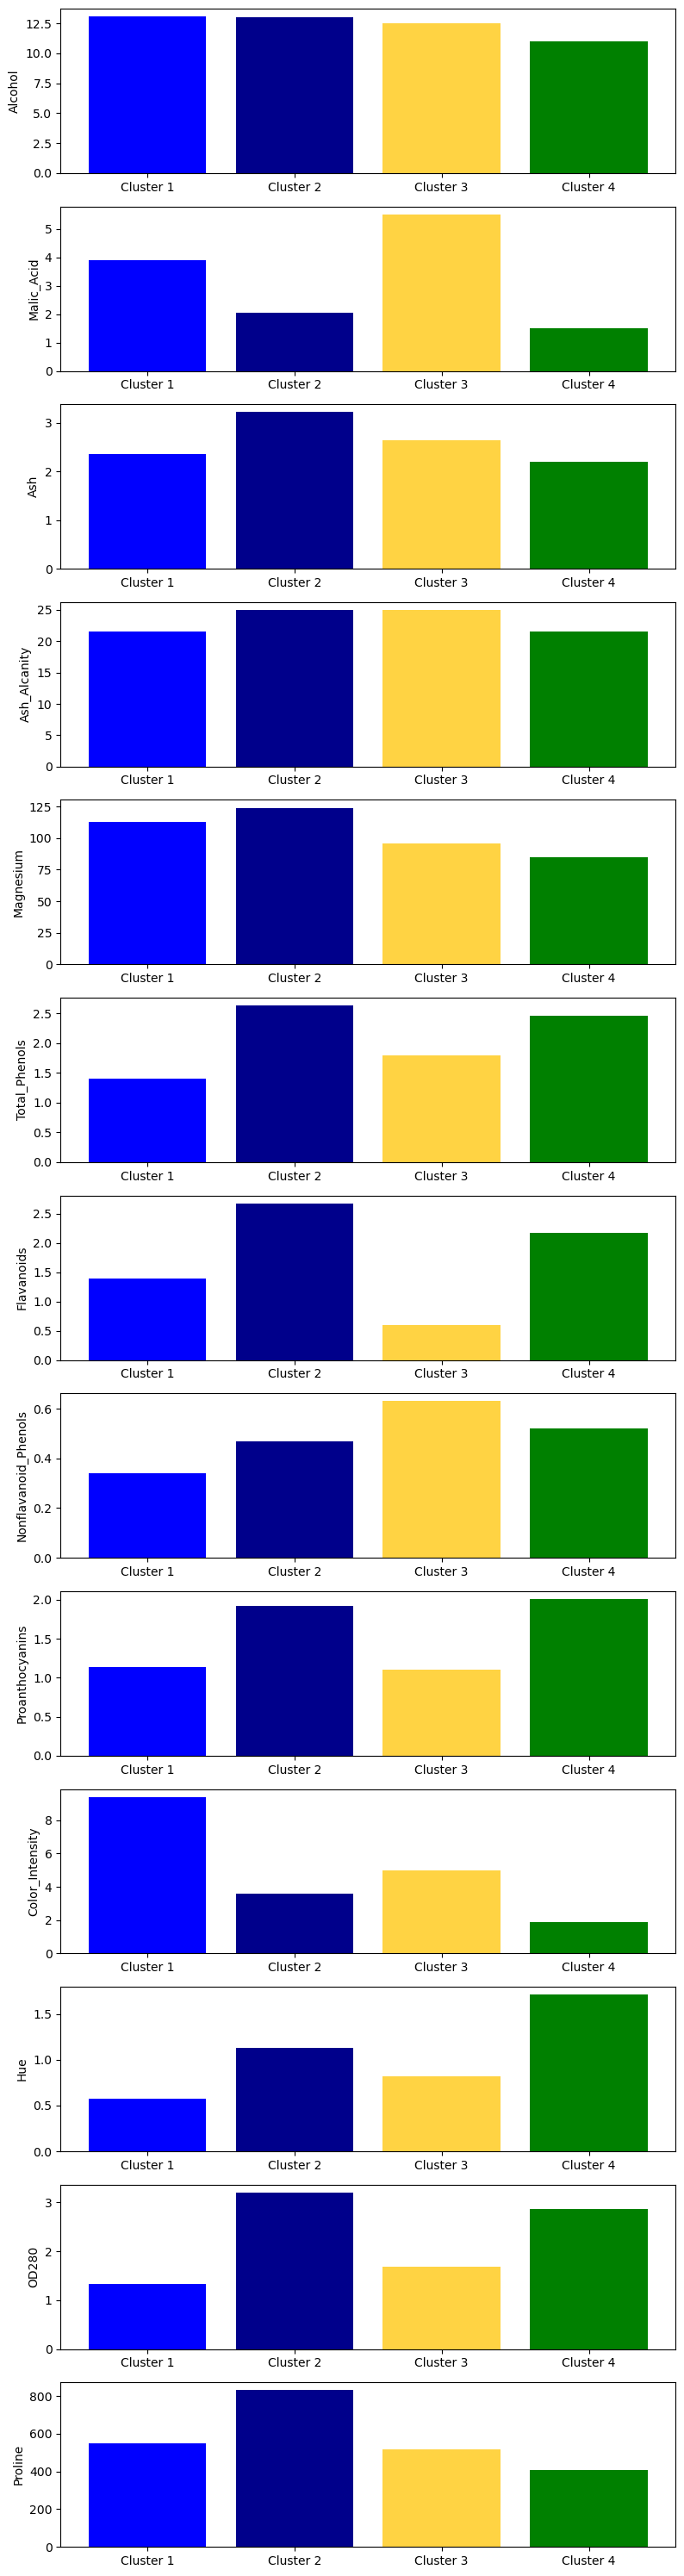

In [159]:
#Grafica de barras para hacerlo más entendible

import pandas as pd
import matplotlib.pyplot as plt

mean_df1 = amarillo_n.mean()
mean_df2 = morado_n.mean()
mean_df3 = verdecillo_n.mean()
mean_df4 = verdesolo_n.mean()

# concatenar
all_data = pd.concat([amarillo_n, morado_n, verdecillo_n, verdesolo_n], keys=['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])

all_data = all_data.transpose()

columns = ['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium', 
           'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols', 'Proanthocyanins',
           'Color_Intensity', 'Hue', 'OD280', 'Proline']

cluster_colors = {'Cluster 1': 'blue', 'Cluster 2': 'darkblue', 'Cluster 3': '#ffd343', 'Cluster 4': 'green'}


fig, axs = plt.subplots(len(columns), 1, figsize=(8, 30))

for i, col in enumerate(columns):
    for cluster in ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']:
        axs[i].bar(cluster, all_data[(cluster, 0)][col], label=cluster, color=cluster_colors[cluster])
    axs[i].set_ylabel(col)

plt.tight_layout()
plt.show()


### Resultados

#### Clasificación de los Grupos de Vino

##### Cluster 2
Este grupo presenta el mayor contenido de fenoles y flavonoides, así como un alto OD280, lo que indica un vino con un perfil sólido y un buen potencial de envejecimiento. Su bajo ácido málico aporta menos acidez y el alto contenido de proantocianidinas mejora la estructura del vino, lo que lo hace mejor al paladar. Aunque la intensidad del color es baja, el equilibrio en su perfil general lo destaca.

##### Cluster 4
Con un alto contenido de fenoles, flavonoides y OD280, este grupo tiene tambien un buen balance y un buen potencial antioxidante. Aunque tiene un menor contenido de alcohol (lo que lo hace un poco peor al cluster 2), su alto matiz sugiere estabilidad en el color, indicando su potencial para envejecer bien.

##### Cluster 1
Este grupo tiene un perfil equilibrado en cuanto a fenoles, flavonoides y OD280. Su intensidad de color es alta, pero el matiz más bajo indica cierta inestabilidad en el color. Esto, junto con el contenido fenólico moderado, lo coloca en una posición intermedia.

##### Cluster 3
Aunque este grupo tiene un perfil equilibrado en cuanto a minerales y proantocianidinas, su contenido de fenoles y OD280 es el más bajo, lo que limita su potencial de envejecimiento y complejidad. El alto contenido de ácido málico puede dar una mayor acidez, afectando así el equilibrio del vino.

#### Clasificación Final

Organizados de mayor calidad a menor calidad de acuerdo a la literatura consultada y los valores de las variables, la clasificación resulta en:


1. Cluster 2: Mayor contenido fenólico, fuerte equilibrio general.
2. Cluster 4: Alto contenido fenólico y buen potencial de envejecimiento.
3. Cluster 1: Buen equilibrio, pero menor calidad que los anteriores.
4. Cluster 3: Limitado en contenido fenólico, con alta acidez.


Aunque es imposible saber qué tipo de vino específico se encuentra en cada cluster, pues la base de datos no menciona sus nombres como tal, de acuerdo a las características obtenidas de cada grupo se pueden hacer algunas conjeturas al respecto:

* El cluster 2 tiene niveles altos de fenoles totales, flavonoides y OD280, así como proantocianianidinas elevadas, esto sugiere un vino con estructura robusta y con un alto potencial de envejecimiento. Algunos vinos potenciales que podrían encontrarse adentro de estre gupo es el Cabarnet Sauvignon y el Syrah/Shiraz, ambos conocidos por sus sabores intensos, alto contenido fenólico y su potencial de envejecimiento.
* El cluster 4 tiene un alto contenido de fenoles totales, flavonoides y OD280, pero es una intensidad menor al anterior, por lo que se buscan sabores más ligeros, como el Merlot y el Sangiovese, que tienen frutalidad. 
* El cluster 1 es moderado en fenoles totales, flavonoides y OD280, por lo que indica un perfil equilibrado pero aun menos intenso que los anterior, por lo tanto se podría encontrar un Pinot Noir o un Tempranillo, que son vinos mucho más ligeros. 
* Por último, se encuentran vinos que no están tan equilibrados, con alta acidez y con menos potencial de envejecimiento, entre ellos podrian estar el Riesling y el Pinot Grigio. 

Aunque los posibles vinos son conjeturas, es posible ver que la forma de los datos y su agrupación muestran un claro patrón, que lo hace sencillo de analizar y ver la manera en que podría utilizarse en aplicaciones prácticas. Esta agrupación permite identificar las características que definen la calidad y el estilo de los vinos, ofreciendo una valiosa herramienta para la clasificación y selección de vinos basada en datos objetivos. A través de técnicas como el Análisis de Componentes Principales y el mapeo topológico, es posible visualizar y entender la estructura subyacente de los datos, lo que facilita la comprensión de las características que influyen en la clasificación del vino.
